# ***Time Series on Electricity Power Consumption***

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

In [2]:
df = pd.read_csv('household_power_consumption.txt',sep=';')

In [3]:
df

,Date,Time,Global_active_power,Global_reactive_power,Voltage,Global_intensity,Sub_metering_1,Sub_metering_2,Sub_metering_3
0,16/12/2006,17:24:00,4.216,0.418,234.840,18.400,0.000,1.000,17.0
1,16/12/2006,17:25:00,5.360,0.436,233.630,23.000,0.000,1.000,16.0
2,16/12/2006,17:26:00,5.374,0.498,233.290,23.000,0.000,2.000,17.0
3,16/12/2006,17:27:00,5.388,0.502,233.740,23.000,0.000,1.000,17.0
4,16/12/2006,17:28:00,3.666,0.528,235.680,15.800,0.000,1.000,17.0
...,...,...,...,...,...,...,...,...,...
2075254,26/11/2010,20:58:00,0.946,0.0,240.43,4.0,0.0,0.0,0.0
2075255,26/11/2010,20:59:00,0.944,0.0,240.0,4.0,0.0,0.0,0.0
2075256,26/11/2010,21:00:00,0.938,0.0,239.82,3.8,0.0,0.0,0.0
2075257,26/11/2010,21:01:00,0.934,0.0,239.7,3.8,0.0,0.0,0.0


In [4]:
# First 5 rows of dataset
df.head()

,Date,Time,Global_active_power,Global_reactive_power,Voltage,Global_intensity,Sub_metering_1,Sub_metering_2,Sub_metering_3
0,16/12/2006,17:24:00,4.216,0.418,234.840,18.400,0.000,1.000,17.0
1,16/12/2006,17:25:00,5.360,0.436,233.630,23.000,0.000,1.000,16.0
2,16/12/2006,17:26:00,5.374,0.498,233.290,23.000,0.000,2.000,17.0
3,16/12/2006,17:27:00,5.388,0.502,233.740,23.000,0.000,1.000,17.0
4,16/12/2006,17:28:00,3.666,0.528,235.680,15.800,0.000,1.000,17.0


In [5]:
# Last 5 rows of dataset
df.tail()

,Date,Time,Global_active_power,Global_reactive_power,Voltage,Global_intensity,Sub_metering_1,Sub_metering_2,Sub_metering_3
2075254,26/11/2010,20:58:00,0.946,0.0,240.43,4.0,0.0,0.0,0.0
2075255,26/11/2010,20:59:00,0.944,0.0,240.0,4.0,0.0,0.0,0.0
2075256,26/11/2010,21:00:00,0.938,0.0,239.82,3.8,0.0,0.0,0.0
2075257,26/11/2010,21:01:00,0.934,0.0,239.7,3.8,0.0,0.0,0.0
2075258,26/11/2010,21:02:00,0.932,0.0,239.55,3.8,0.0,0.0,0.0


In [6]:
df.shape

(2075259, 9)

**There are 20 lacs+ rows with 9 columns in the dataset.**

In [7]:
print('Columns of dataset are:\n')
for i,col in enumerate(df.columns.tolist()):
  print(i+1,'-',col)

Columns of dataset are:

1 - Date
2 - Time
3 - Global_active_power
4 - Global_reactive_power
5 - Voltage
6 - Global_intensity
7 - Sub_metering_1
8 - Sub_metering_2
9 - Sub_metering_3


In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2075259 entries, 0 to 2075258
Data columns (total 9 columns):
 #   Column                 Dtype  
---  ------                 -----  
 0   Date                   object 
 1   Time                   object 
 2   Global_active_power    object 
 3   Global_reactive_power  object 
 4   Voltage                object 
 5   Global_intensity       object 
 6   Sub_metering_1         object 
 7   Sub_metering_2         object 
 8   Sub_metering_3         float64
dtypes: float64(1), object(8)
memory usage: 142.5+ MB


1.  **Will convert the date column to datetime format.**
2.   **It seems that there are inconsistency in columns becoz numerical columns are also as object type in the dataset. We will convert it back to numerical dtype.**

In [9]:
df1 = df[["Date","Time","Global_active_power"]]

In [10]:
# Combine and convert to datetime
df1['Datetime'] = pd.to_datetime(df1['Date'] + ' ' + df1['Time'], dayfirst=True)
df1.set_index('Datetime', inplace=True)
df1.drop(columns=['Date', 'Time'], inplace=True)

In [11]:
df1["Global_active_power"] = pd.to_numeric(df1["Global_active_power"],errors='coerce')

***Handle Missing Values***

In [12]:
df1.isnull().sum()

,0
Global_active_power,25979


In [13]:
df.isnull().sum()

,0
Date,0
Time,0
Global_active_power,0
Global_reactive_power,0
Voltage,0
Global_intensity,0
Sub_metering_1,0
Sub_metering_2,0
Sub_metering_3,25979


In [14]:
print(f'Percentage of Missing values in the Dataset : {round((df.isnull().sum()[-1]*100/df.shape[0]),2)} %')

Percentage of Missing values in the Dataset : 1.25 %


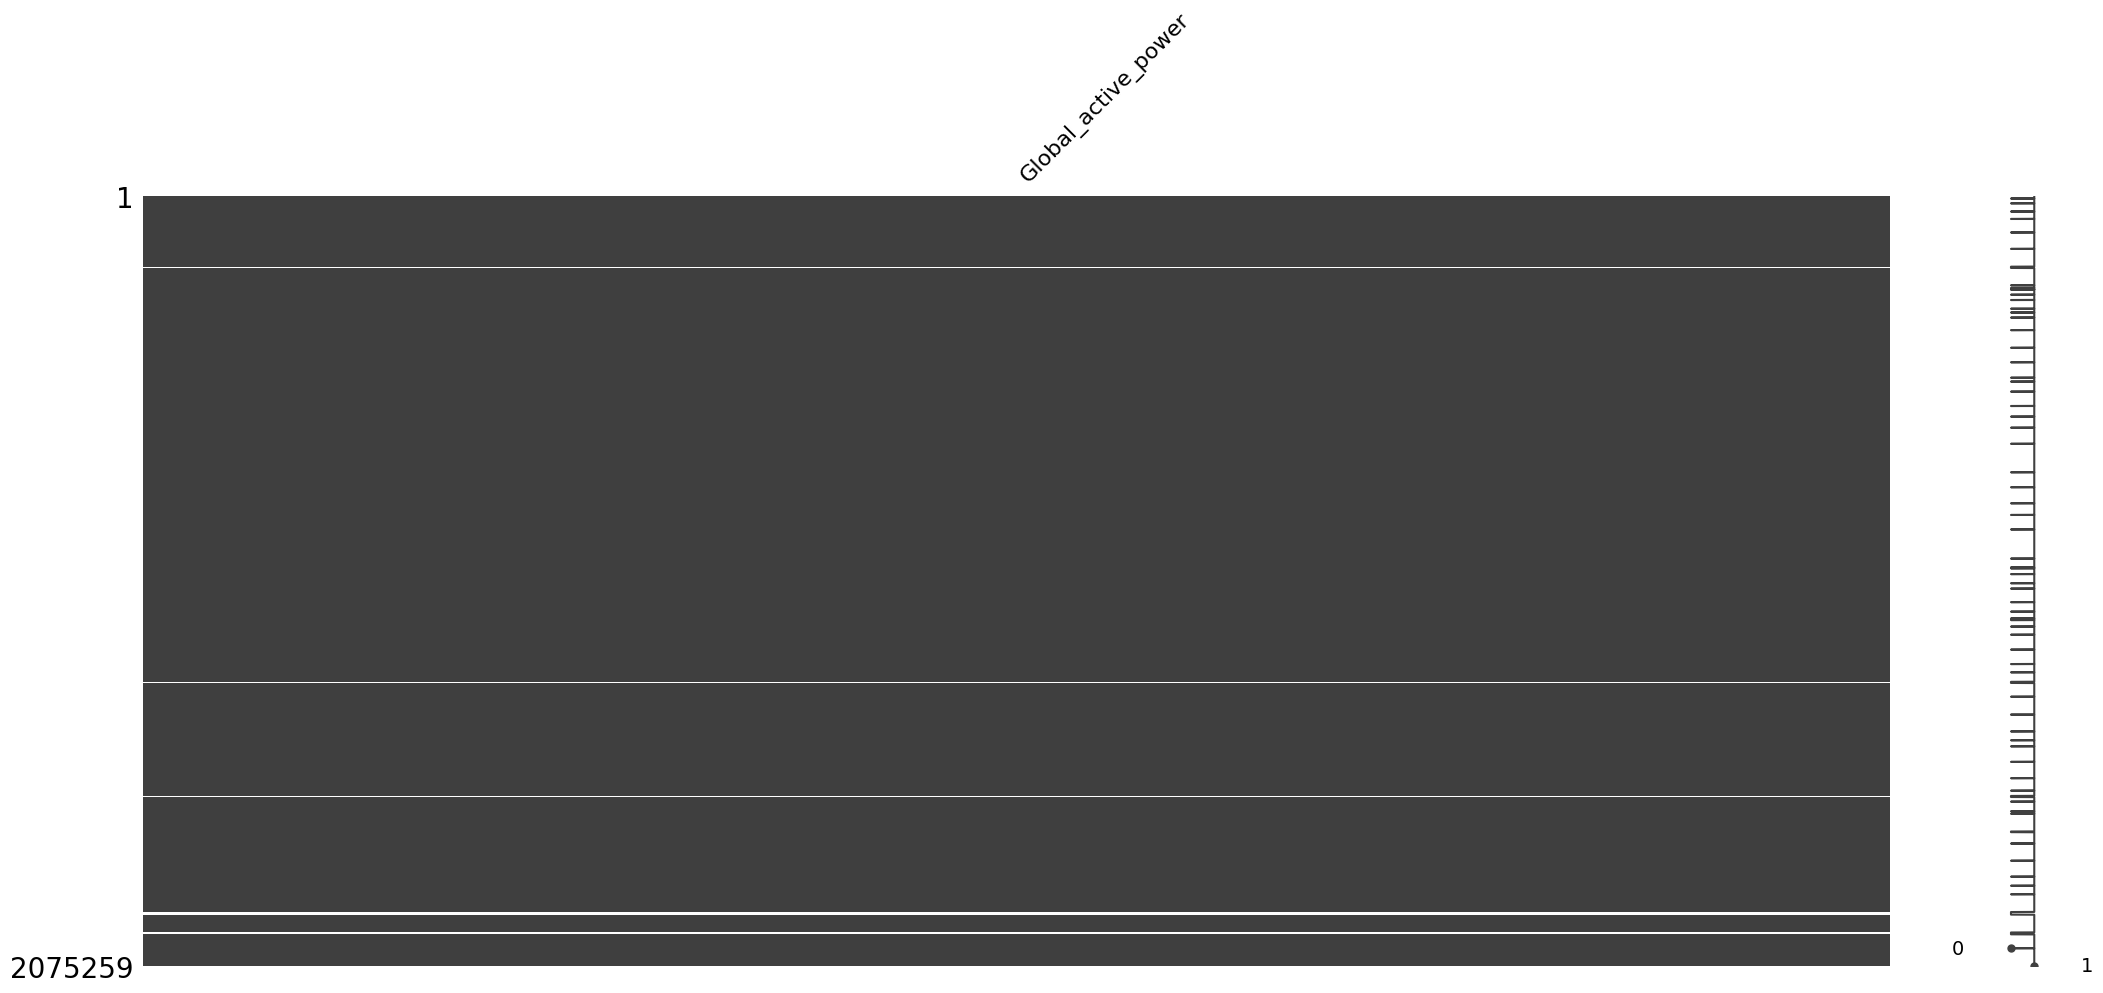

In [15]:
import missingno as mn
mn.matrix(df1)
plt.show()

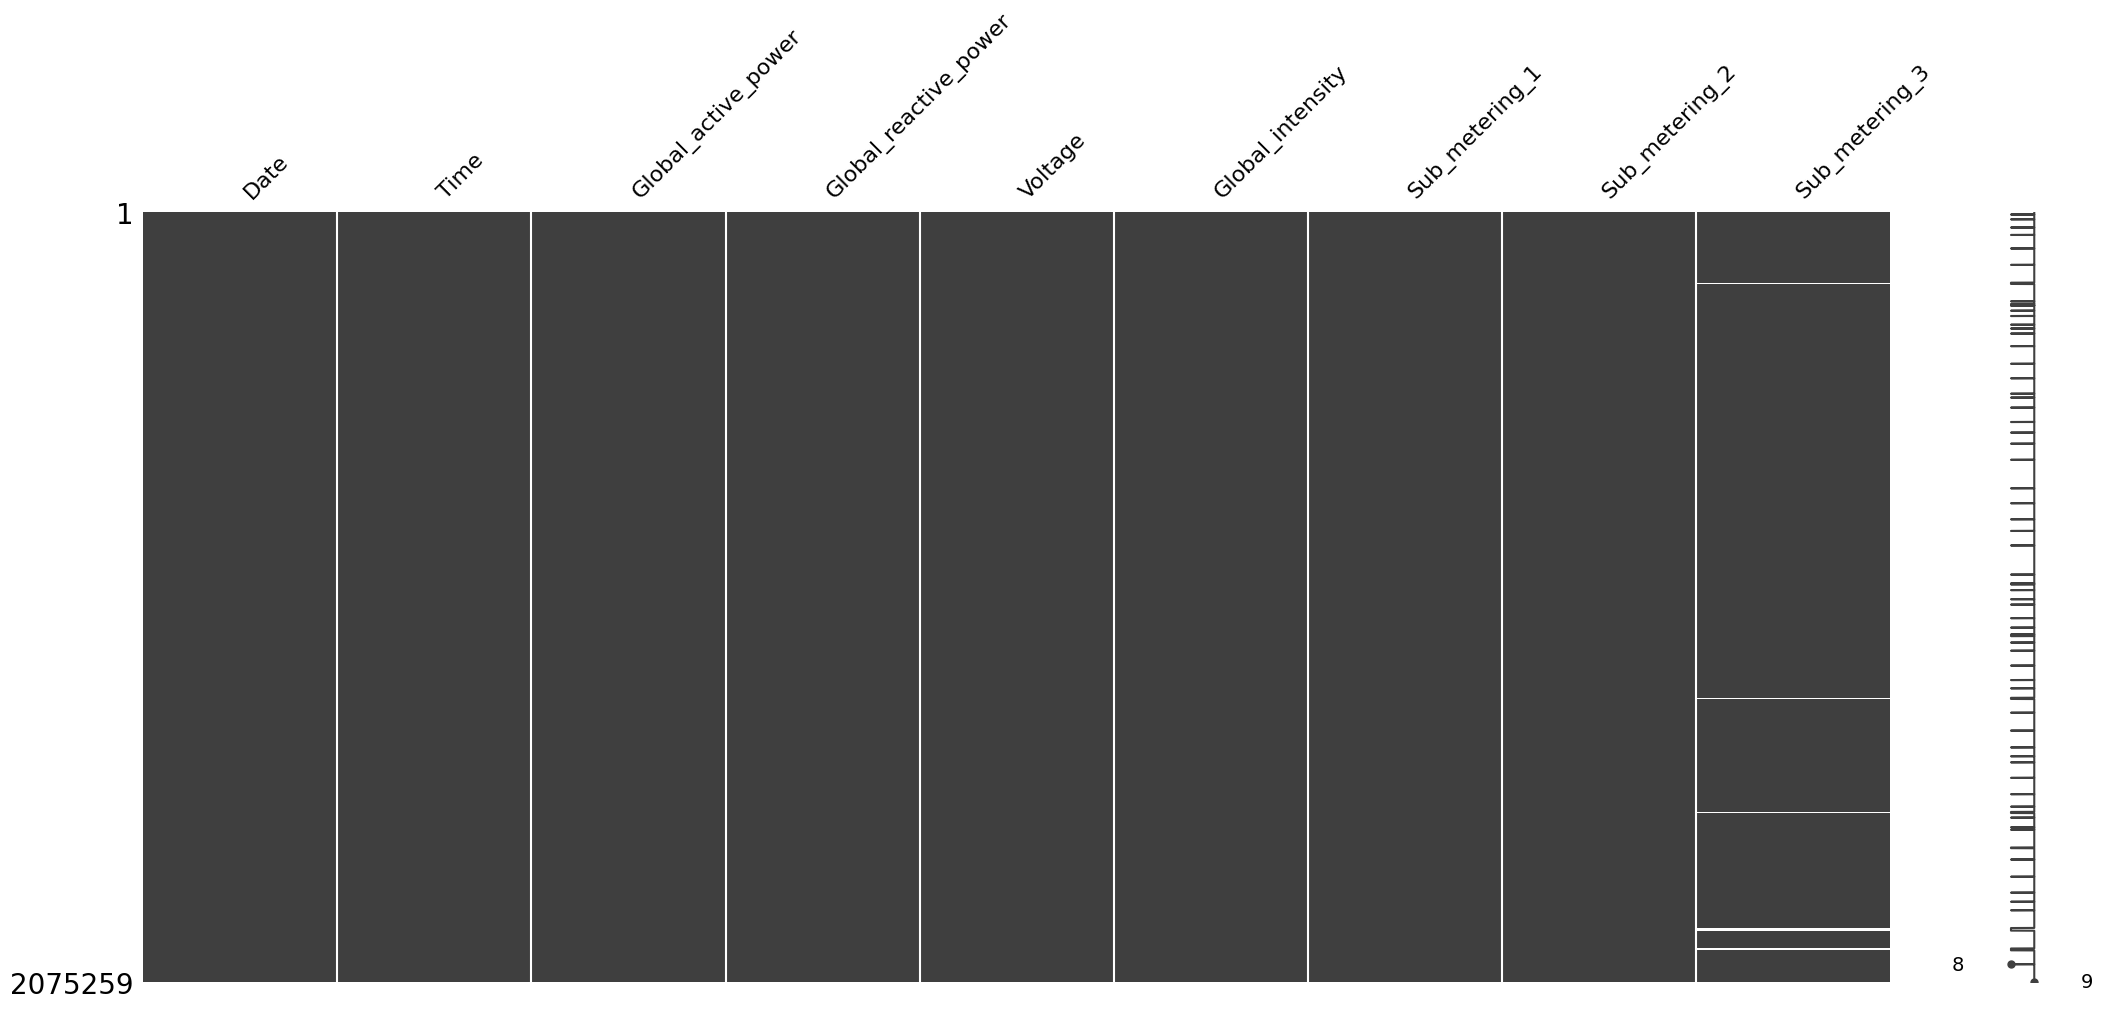

In [16]:
mn.matrix(df)
plt.show()

In [17]:
df1.dropna(inplace=True)

## ***Resampling to Weekly Data***

In [18]:
df_weekly = df1.resample('W').sum()

In [19]:
df_weekly.head()

,Global_active_power
Datetime,
2006-12-17,4599.636
2006-12-24,17477.128
2006-12-31,19736.518
2007-01-07,14961.068
2007-01-14,16176.334


In [20]:
df_weekly.isnull().sum()

,0
Global_active_power,0


In [21]:
df_weekly.columns=["EC"]
df_weekly.shape

(207, 1)

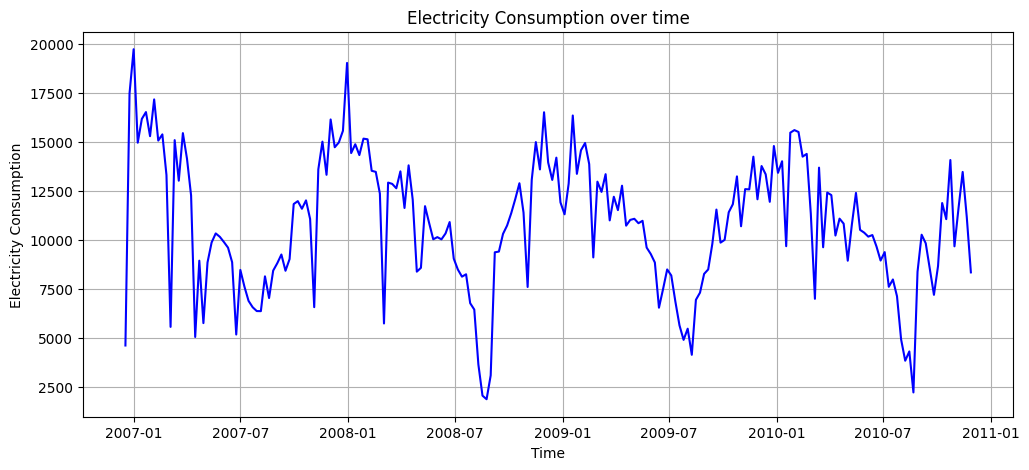

In [22]:
fig, ax = plt.subplots(figsize=(12,5))
ax.plot(df_weekly.index,df_weekly["EC"],color="blue",label="Initial plot")
ax.set_xlabel('Time')
ax.set_ylabel("Electricity Consumption")
ax.set_title("Electricity Consumption over time")
plt.grid(True)
plt.show()

**Series seems stationary in nature & also reflecting seasonal bahaviour.**

## ***Decomposition of the Series***

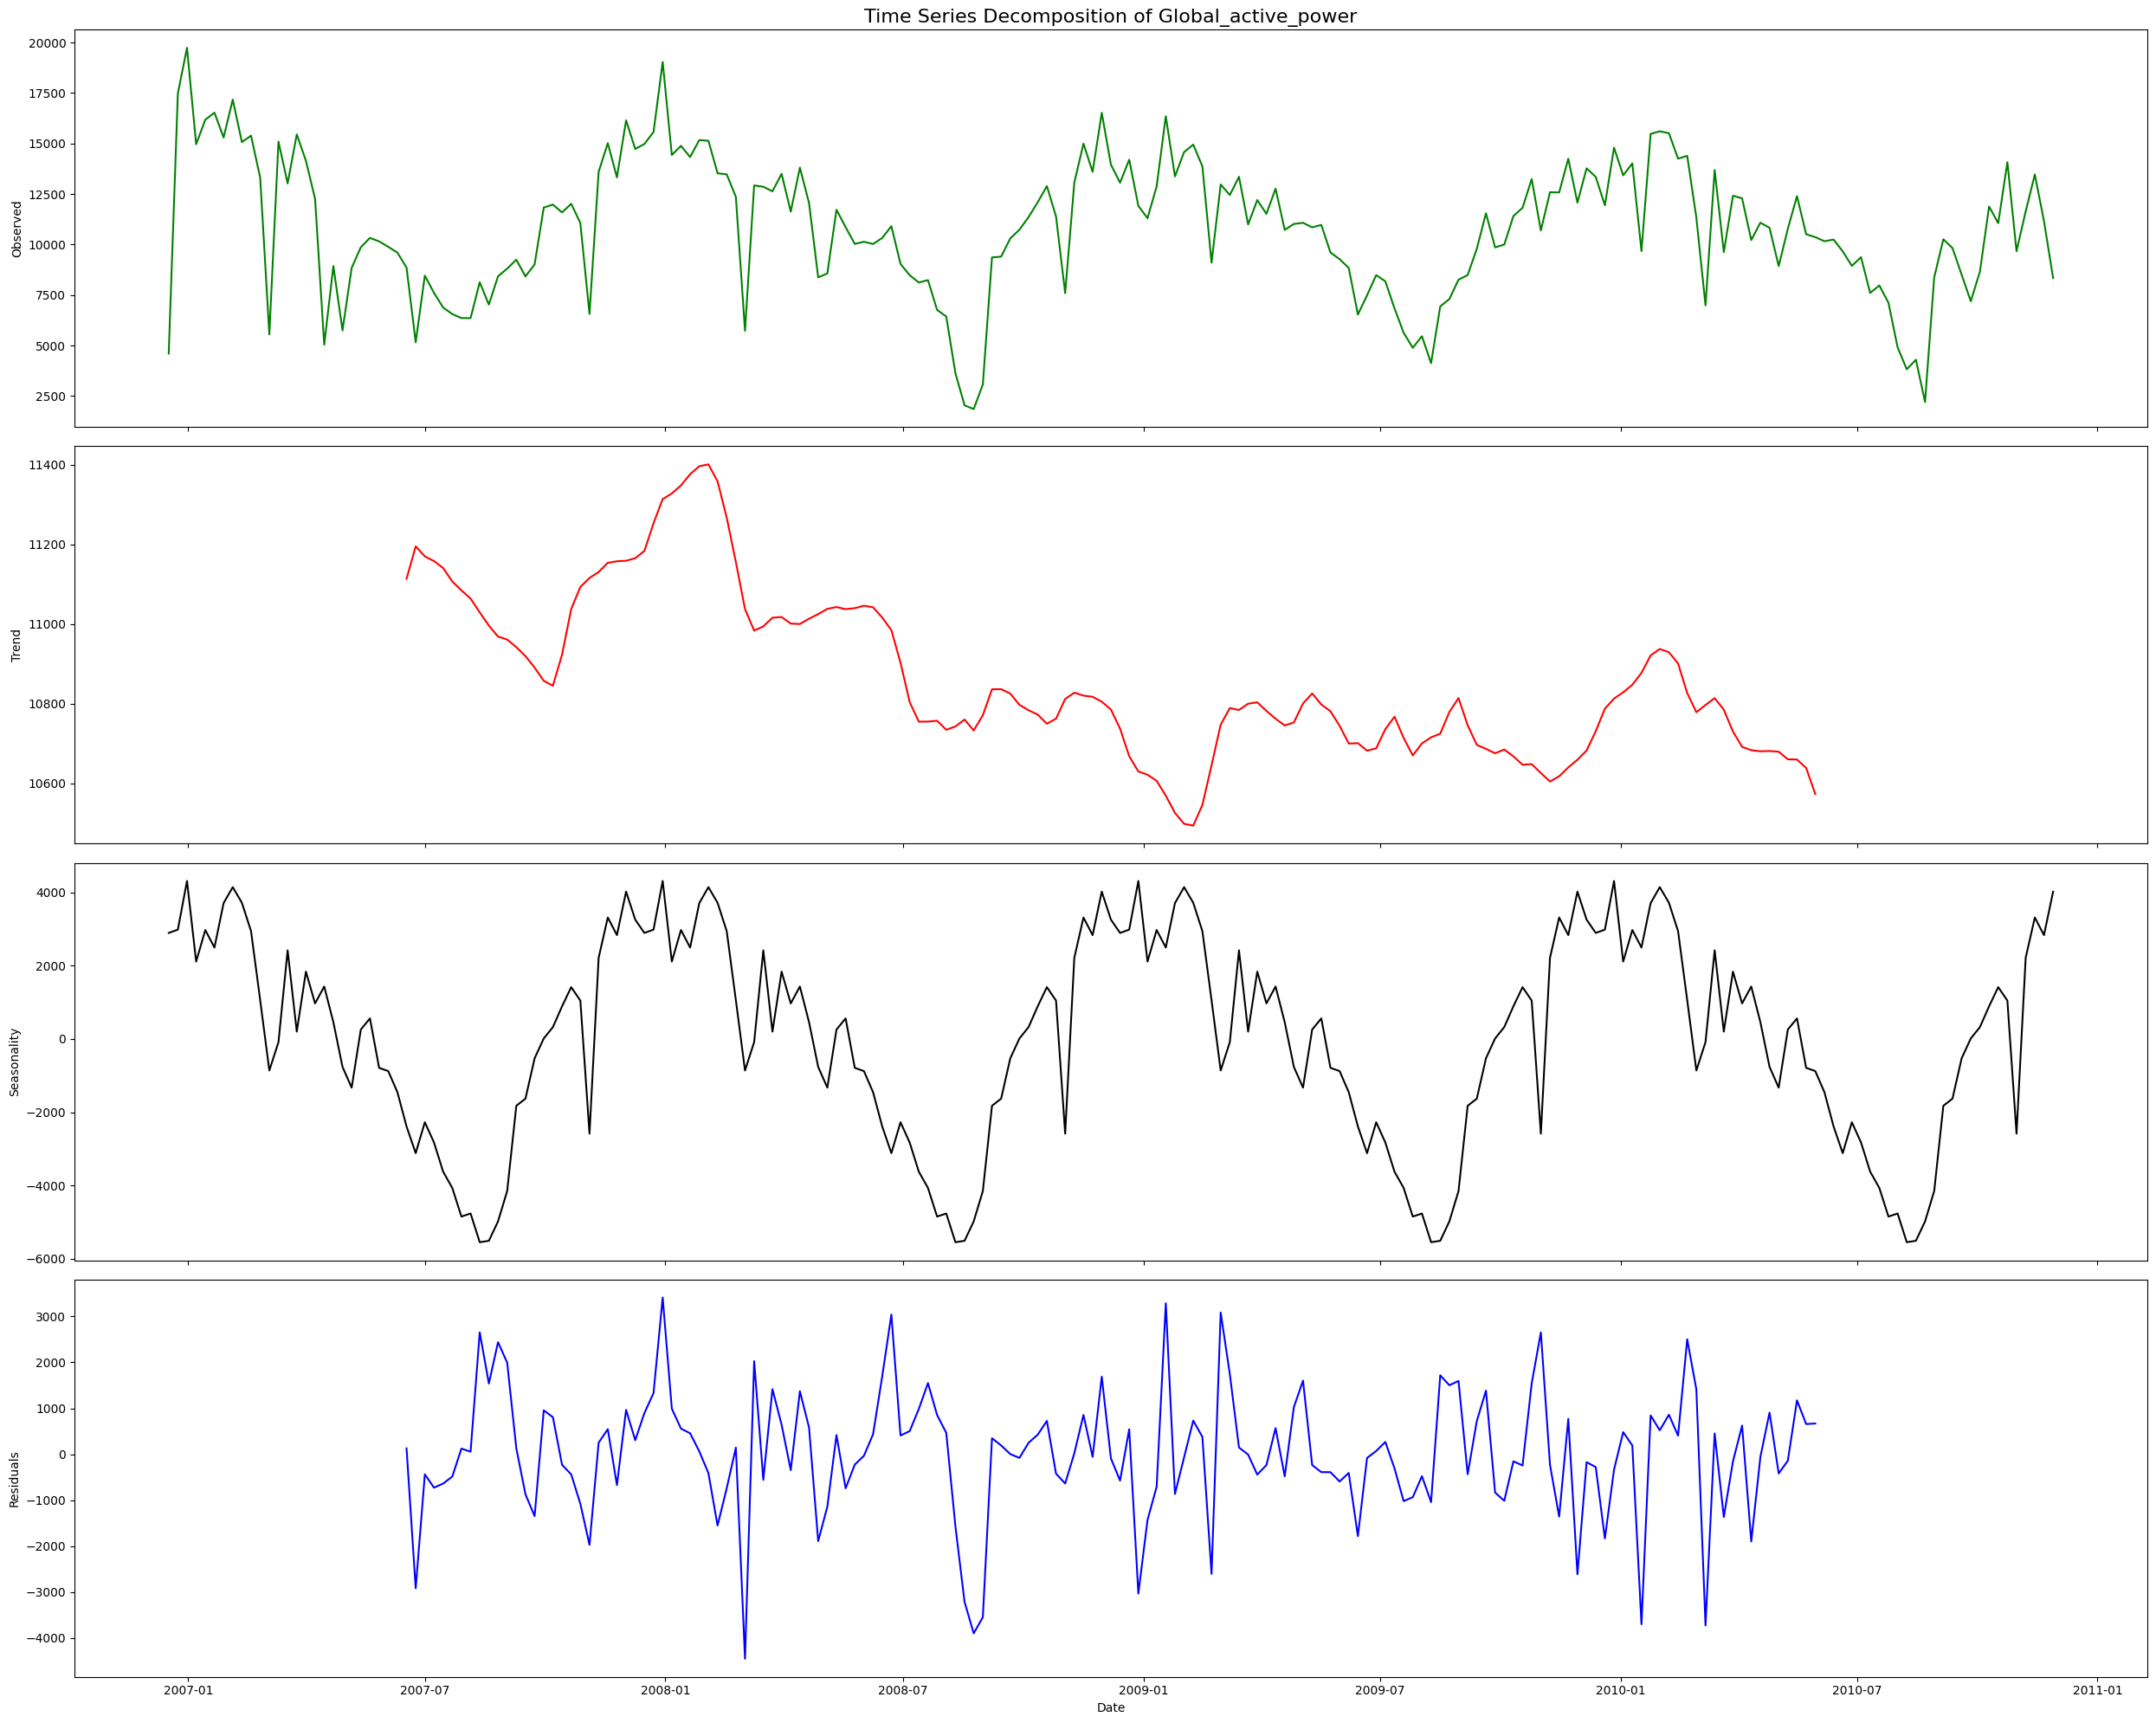

In [23]:
# Decompose the series
from statsmodels.tsa.seasonal import STL , seasonal_decompose
result = seasonal_decompose(df_weekly['EC'], model='additive', period=52)

# Custom large plots
fig, axes = plt.subplots(4, 1, figsize=(25, 20), sharex=True)

# Plot observed
axes[0].plot(result.observed, color='green')
axes[0].set_ylabel("Observed")
axes[0].set_title("Time Series Decomposition of Global_active_power", fontsize=16)

# Plot trend
axes[1].plot(result.trend, color='red')
axes[1].set_ylabel("Trend")

# Plot seasonal
axes[2].plot(result.seasonal, color='black')
axes[2].set_ylabel("Seasonality")

# Plot residual
axes[3].plot(result.resid, color='blue')
axes[3].set_ylabel("Residuals")
axes[3].set_xlabel("Date")

plt.tight_layout()
plt.show()

**It is clear that yearly seasonality is present in the series**

## ***Testing for Seasonality***

In [24]:
import plotly.express as px

# Perform Fourier Transform
fft_vals = np.fft.fft(df_weekly['EC'])
fft_freqs = np.fft.fftfreq(len(df_weekly))

# Only keep the positive frequencies
positive_freqs = fft_freqs[fft_freqs >= 0]
positive_vals = np.abs(fft_vals[fft_freqs >= 0])

fig = px.line(y= positive_vals, x=positive_freqs, title='Periodogram')
fig.update_layout(
    xaxis_title='Frequency',
    yaxis_title='Amplitude'
)
fig.show()

In [25]:
1/0.01932367

51.75000401062531

**we found a higher spike on 0.01932367 which is nothing but 1/52. Hence here in the weekly data yearly seasonality is present.**

## ***ADF Test For Stationarity***

In [26]:
# ADF test
from statsmodels.tsa.stattools import adfuller
result = adfuller(df_weekly['EC'])
print('ADF Statistic: %f' % result[0])
print('p-value: %f' % result[1])

ADF Statistic: -4.302692
p-value: 0.000439


***Since p-value < 0.05, hence the Time Series is Stationary***

# ***ACF Plot***

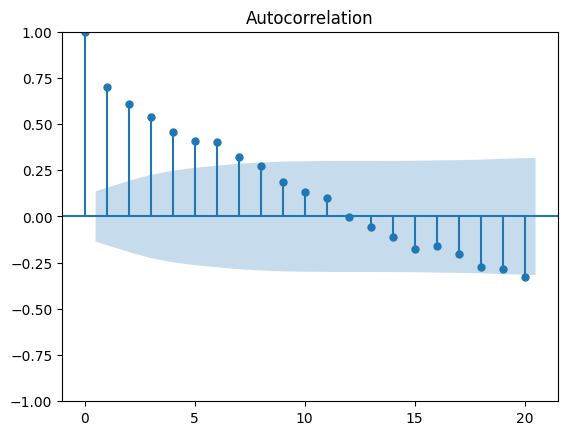

In [27]:
# ACF plot
from statsmodels.graphics.tsaplots import plot_acf
plot_acf(df_weekly["EC"],lags=20)
plt.show()

**Clearly exponential decay in ACF plot hence series is not a purely MA(q) process.**

# ***PACF Plot***

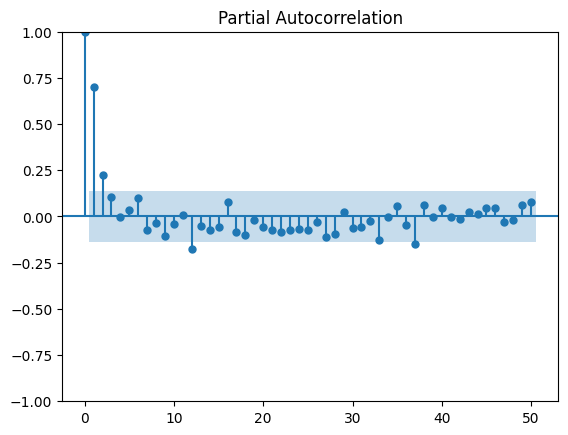

In [28]:
# PACF plot
from statsmodels.graphics.tsaplots import plot_pacf
plot_pacf(df_weekly['EC'],lags=50)
plt.show()

**PACF plot indicates that this series might be AR(2) process.**

## ***Towards Model Building***

In [29]:
# spliting
train = df_weekly[:int(0.95*(len(df_weekly)))]
test = df_weekly[int(0.95*(len(df_weekly))):]

In [30]:
train.shape

(196, 1)

# ***ARIMA***

In [31]:
from statsmodels.tsa.arima.model import ARIMA

**Finding the best ARIMA Model**

In [32]:
import warnings
warnings.filterwarnings("ignore")
l=[]
def models(p,q):
    model = ARIMA(train['EC'], order=(p,0,q))
    m=model.fit()
    l.append([[(p,0,q)],m.aic])

In [33]:
from itertools import product
p = range(0, 6)
q = range(0, 6)

In [34]:
for p,q in product(p,q):
   models(p,q)

In [35]:
d=pd.DataFrame(l,columns=["Model","AIC"])
data=d.sort_values(by="AIC",ascending=True)
data.head(5)

,Model,AIC
17,"[(2, 0, 5)]",3580.625220
23,"[(3, 0, 5)]",3585.587396
21,"[(3, 0, 3)]",3600.310892
27,"[(4, 0, 3)]",3601.511876
26,"[(4, 0, 2)]",3601.811806


### ***Fitting ARIMA(2,0,5) Model***

In [36]:
#fitting ARIMA(2,0,5)
model = ARIMA(train['EC'], order=(2,0,5))
model_fit = model.fit()
print(model_fit.summary())

                               SARIMAX Results                                
Dep. Variable:                     EC   No. Observations:                  196
Model:                 ARIMA(2, 0, 5)   Log Likelihood               -1781.313
Date:                Wed, 03 Sep 2025   AIC                           3580.625
Time:                        11:00:41   BIC                           3610.128
Sample:                    12-17-2006   HQIC                          3592.569
                         - 09-12-2010                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const       1.082e+04    198.933     54.409      0.000    1.04e+04    1.12e+04
ar.L1          1.9845      0.002   1178.895      0.000       1.981       1.988
ar.L2         -0.9987      0.002   -659.753      0.0

### ***Model Diagnostics***

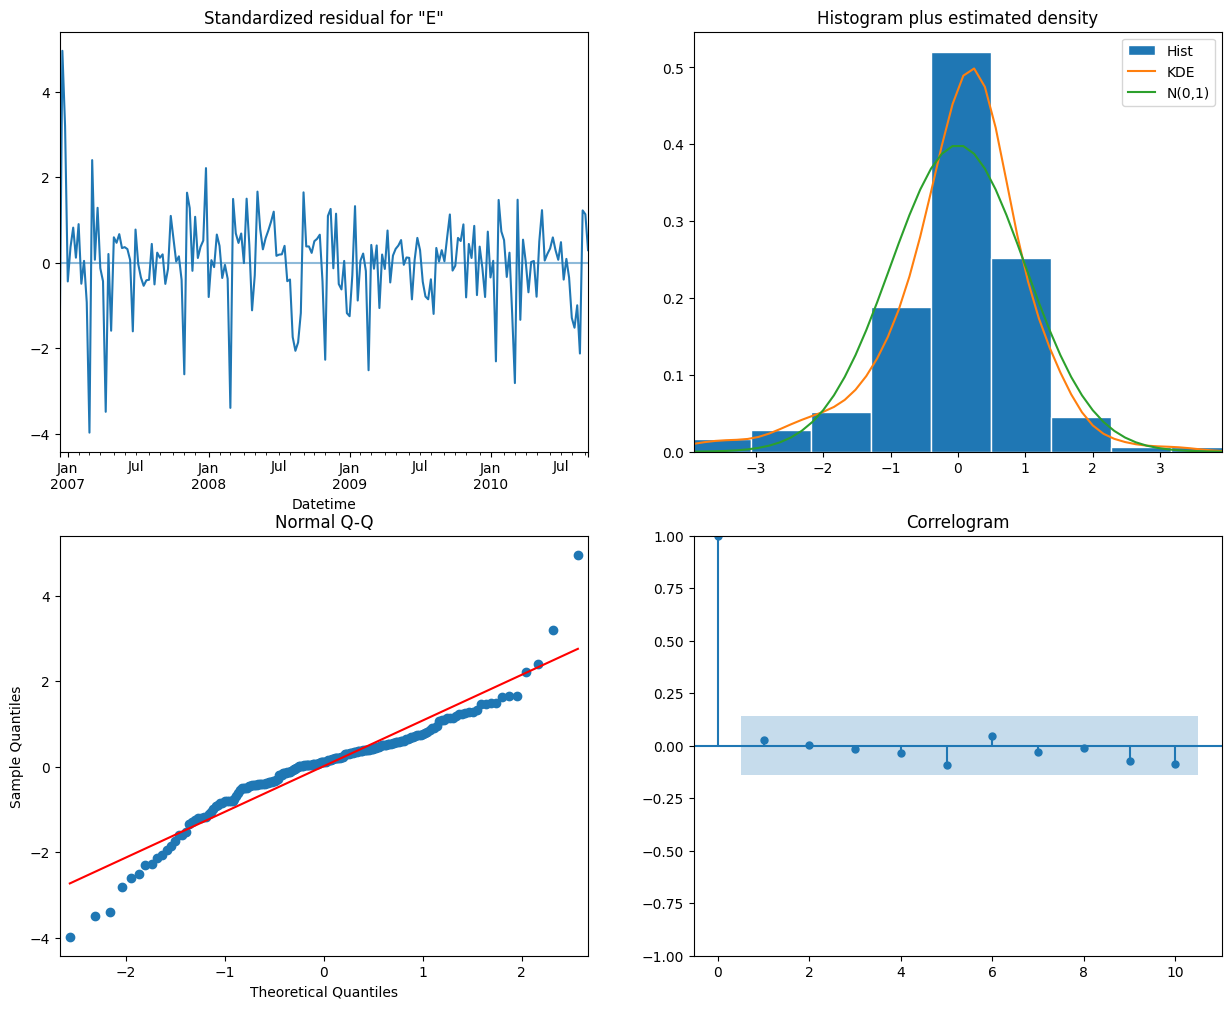

In [37]:
model_fit.plot_diagnostics(figsize=(15, 12))
plt.show()

**According to the qualitative analysis, residuals approximately resemble white noise.**

## ***Forecasting through ARIMA(2,0,5) Model***

In [38]:
# Predict on training data (in-sample fit)
train_preds = model_fit.fittedvalues

# Predict on test data (out-of-sample forecast)
test_preds = model_fit.forecast(steps=len(test))

In [39]:
import plotly.graph_objects as go

fig = go.Figure()

# Actual train
fig.add_trace(go.Scatter(x=train.index, y=train['EC'], mode='lines', name='Observed - Train'))

# Actual test
fig.add_trace(go.Scatter(x=test.index, y=test['EC'], mode='lines', name='Observed - Test'))

# Predicted train
fig.add_trace(go.Scatter(x=train.index, y=train_preds, mode='lines', name='Predicted - Train'))

# Predicted test
fig.add_trace(go.Scatter(x=test.index, y=test_preds, mode='lines', name='Predicted - Test'))

# Layout
fig.update_layout(
    title='Observed vs Predicted EC (Train & Test)',
    xaxis_title='Date',
    yaxis_title='EC'
)

fig.show()

In [40]:
arima_mape = np.mean(np.abs(model_fit.predict(start=len(train),end=len(df_weekly)-1)-test['EC'])/np.abs(test['EC']))

In [41]:
arima_mape

np.float64(0.1782165350714667)

# ***SARIMA***

In [42]:
#Sarima model
from statsmodels.tsa.statespace.sarimax import SARIMAX
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings("ignore")
l=[]
def models(p,q,P,Q):
    model=SARIMAX(train,order=(p,0,q),
                       seasonal_order=(P,0,Q,52))
    try:
        m=model.fit()
        l.append([[(p,0,q),(P,0,Q)],m.aic,np.mean(np.abs(m.predict(start=len(train),end=len(df_weekly)-1)-test['EC'])/np.abs(test['EC']))])
    except:
        print("Error in fitting model for parameters: ", (p,0,q), (P,0,Q))
        pass

In [43]:
from itertools import product
p = range(0, 3)
q = range(0, 3)
P = range(0, 2)
Q = range(0, 2)

In [44]:
for params in set(product(p,q,P,Q)):
   models(*params)

In [45]:
d=pd.DataFrame(l,columns=["Model","AIC","MAPE"])
data=d.sort_values(by="AIC",ascending=True)
data.head(10)

,Model,AIC,MAPE
24,"[(2, 0, 2), (1, 0, 0)]",3599.421726,0.156301
20,"[(2, 0, 1), (1, 0, 0)]",3602.667495,0.169335
16,"[(1, 0, 1), (1, 0, 1)]",3602.790958,0.162712
29,"[(1, 0, 1), (1, 0, 0)]",3602.799058,0.164130
14,"[(1, 0, 2), (1, 0, 0)]",3603.007251,0.165691
10,"[(2, 0, 1), (1, 0, 1)]",3603.142115,0.165334
1,"[(1, 0, 2), (1, 0, 1)]",3603.468050,0.164000
35,"[(1, 0, 1), (0, 0, 1)]",3605.721377,0.174953
30,"[(2, 0, 1), (0, 0, 1)]",3606.511345,0.189689
23,"[(1, 0, 2), (0, 0, 1)]",3606.729665,0.182354


In [46]:
from statsmodels.tsa.statespace.sarimax import SARIMAX
import matplotlib.pyplot as plt
order = (2, 0, 2)                  # Non-seasonal (p, d, q)
seasonal_order = (1, 0, 0, 52)    # Seasonal (P, D, Q, s)

# Fit the model (enable checks for faster convergence)
model = SARIMAX(train["EC"],
                order=order,
                seasonal_order=seasonal_order
                )
results = model.fit(disp=False)

In [47]:
print(results.summary())

                                      SARIMAX Results                                      
Dep. Variable:                                  EC   No. Observations:                  196
Model:             SARIMAX(2, 0, 2)x(1, 0, [], 52)   Log Likelihood               -1793.711
Date:                             Wed, 03 Sep 2025   AIC                           3599.422
Time:                                     11:01:52   BIC                           3619.090
Sample:                                 12-17-2006   HQIC                          3607.385
                                      - 09-12-2010                                         
Covariance Type:                               opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          1.8285      0.101     18.194      0.000       1.632       2.025
ar.L2         -0.8286      

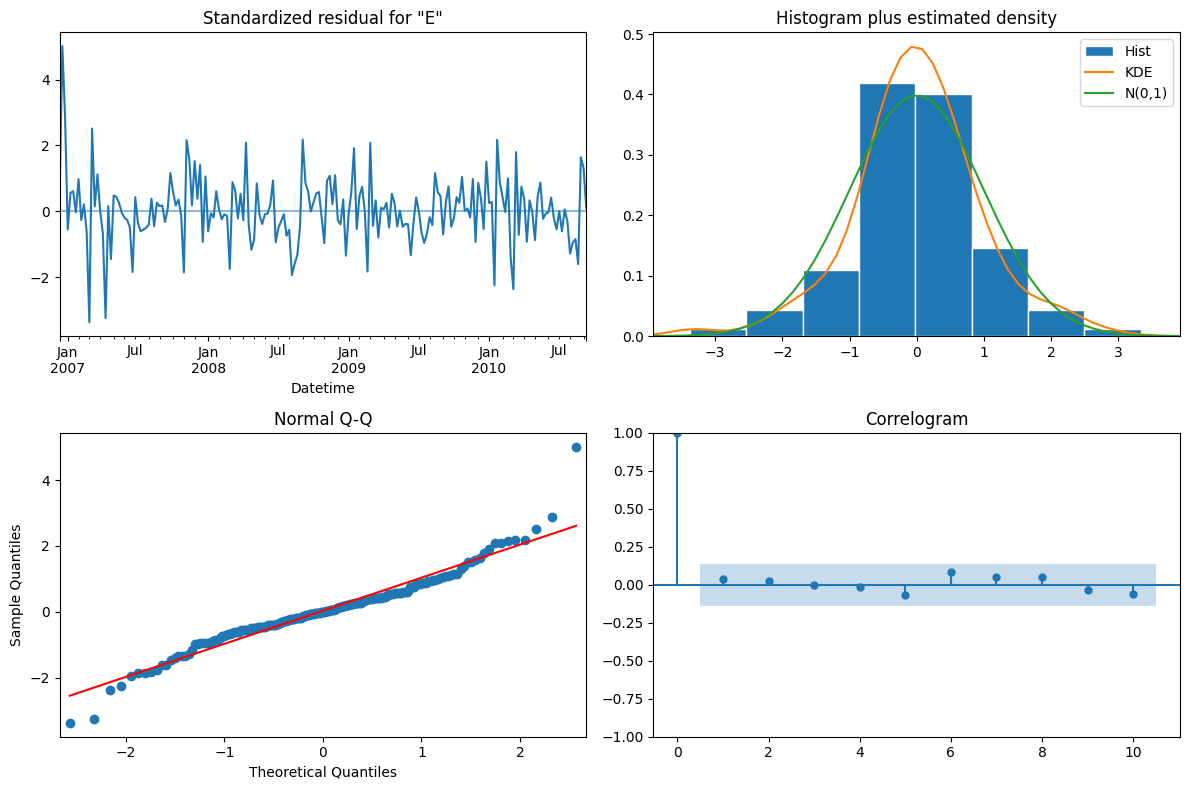

In [48]:
results.plot_diagnostics(figsize=(12, 8))
plt.tight_layout()
plt.show()

In [49]:
# Predict on training data (in-sample fit)
train_preds = results.fittedvalues

# Predict on test data (out-of-sample forecast)
test_preds = results.forecast(steps=len(test))


In [50]:
import plotly.graph_objects as go

fig = go.Figure()

# Actual train
fig.add_trace(go.Scatter(x=train.index, y=train['EC'], mode='lines', name='Observed - Train'))

# Actual test
fig.add_trace(go.Scatter(x=test.index, y=test['EC'], mode='lines', name='Observed - Test'))

# Predicted train
fig.add_trace(go.Scatter(x=train.index, y=train_preds, mode='lines', name='Predicted - Train'))

# Predicted test
fig.add_trace(go.Scatter(x=test.index, y=test_preds, mode='lines', name='Predicted - Test'))

# Layout
fig.update_layout(
    title='Observed vs Predicted EC (Train & Test)',
    xaxis_title='Date',
    yaxis_title='EC'
)

fig.show()

In [51]:
sarima_mape = np.mean(np.abs(results.predict(start=len(train),end=len(df_weekly)-1)-test['EC'])/np.abs(test['EC']))

In [52]:
sarima_mape

np.float64(0.15630113885176633)

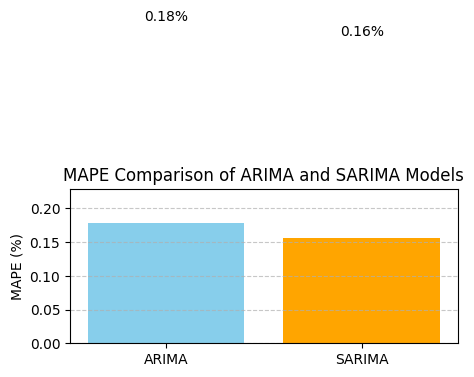

In [53]:
models = ['ARIMA', 'SARIMA']
mape_values = [arima_mape, sarima_mape]
# Create bar plot
plt.figure(figsize=(5, 2))
bars = plt.bar(models, mape_values, color=['skyblue', 'orange'])

# Add value labels on top
for bar in bars:
    yval = bar.get_height()
    plt.text(bar.get_x() + bar.get_width()/2, yval + 0.3, f'{yval:.2f}%', ha='center', fontsize=10)

# Aesthetics
plt.title('MAPE Comparison of ARIMA and SARIMA Models')
plt.ylabel('MAPE (%)')
plt.ylim(0, max(mape_values) + 0.05)
plt.grid(axis='y', linestyle='--', alpha=0.7)

plt.tight_layout()
plt.show()

**SARIMA overperformed the baseline model ARIMA.**

# ***Fitting Deep Learning Models***

In [54]:
## fitting deep learning models
df_hourly = df1.resample('H').sum()

In [55]:
df_hourly.columns=["EC"]
df_hourly.shape

(34589, 1)

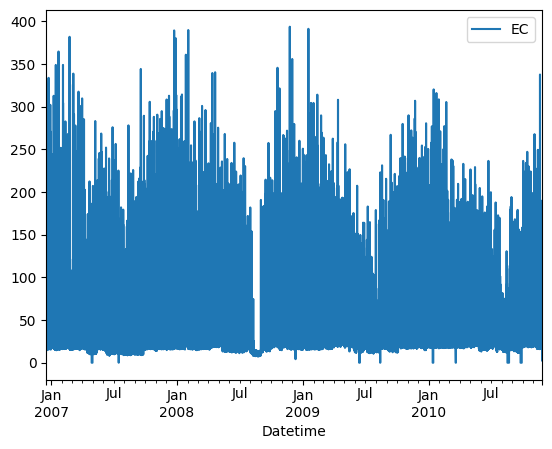

In [56]:
df_hourly.plot()
plt.show()

In [57]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
scaled_data = scaler.fit_transform(df_hourly[['EC']])

**Neural networks work better with scaled data**

In [58]:
def create_sequences(data, time_steps=30):
    X, y = [], []
    for i in range(len(data) - time_steps):
        X.append(data[i:i + time_steps])
        y.append(data[i + time_steps])
    return np.array(X), np.array(y)

time_steps = 30
X, y = create_sequences(scaled_data, time_steps)

In [59]:
split = int(0.8 * len(X))
X_train, X_test = X[:split], X[split:]
y_train, y_test = y[:split], y[split:]

In [60]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import SimpleRNN, Dense
from tensorflow.keras.layers import Dropout
model_rnn = Sequential([
    SimpleRNN(64, activation='relu', return_sequences=False, input_shape=(time_steps, 1)),
    Dropout(0.2),
    Dense(32, activation='relu'),   # Added dense layer
    Dropout(0.2),
    Dense(16, activation='relu'),   # Another dense layer
    Dense(1)
])

model_rnn.compile(optimizer='adam', loss='mse')
model_rnn.fit(X_train, y_train, epochs=20, batch_size=32, validation_data=(X_test, y_test))

Epoch 1/20
864/864 ━━━━━━━━━━━━━━━━━━━━ 10s 7ms/step - loss: 0.0124 - val_loss: 0.0065
Epoch 2/20
864/864 ━━━━━━━━━━━━━━━━━━━━ 4s 5ms/step - loss: 0.0097 - val_loss: 0.0069
Epoch 3/20
864/864 ━━━━━━━━━━━━━━━━━━━━ 5s 5ms/step - loss: 0.0090 - val_loss: 0.0063
Epoch 4/20
864/864 ━━━━━━━━━━━━━━━━━━━━ 4s 5ms/step - loss: 0.0091 - val_loss: 0.0062
Epoch 5/20
864/864 ━━━━━━━━━━━━━━━━━━━━ 4s 5ms/step - loss: 0.0089 - val_loss: 0.0061
Epoch 6/20
864/864 ━━━━━━━━━━━━━━━━━━━━ 4s 5ms/step - loss: 0.0086 - val_loss: 0.0060
Epoch 7/20
864/864 ━━━━━━━━━━━━━━━━━━━━ 5s 5ms/step - loss: 0.0088 - val_loss: 0.0060
Epoch 8/20
864/864 ━━━━━━━━━━━━━━━━━━━━ 5s 5ms/step - loss: 0.0090 - val_loss: 0.0060
Epoch 9/20
864/864 ━━━━━━━━━━━━━━━━━━━━ 4s 5ms/step - loss: 0.0088 - val_loss: 0.0061
Epoch 10/20
864/864 ━━━━━━━━━━━━━━━━━━━━ 4s 5ms/step - loss: 0.0089 - val_loss: 0.0060
Epoch 11/20
864/864 ━━━━━━━━━━━━━━━━━━━━ 5s 5ms/step - loss: 0.0087 - val_loss: 0.0060
Epoch 12/20
864/864 ━━━━━━━━━━━━━━━━━━━━ 5s 5ms/ste

In [61]:
from tensorflow.keras.layers import LSTM

model_lstm = Sequential([
    LSTM(64, activation='relu', return_sequences=False, input_shape=(time_steps, 1)),
    Dropout(0.2),
    Dense(32, activation='relu'),   # Added dense layer
    Dropout(0.2),
    Dense(16, activation='relu'),   # Another dense layer

    Dense(1)
])

model_lstm.compile(optimizer='adam', loss='mse')
model_lstm.fit(X_train, y_train, epochs=20, batch_size=32, validation_data=(X_test, y_test))

Epoch 1/20
864/864 ━━━━━━━━━━━━━━━━━━━━ 11s 8ms/step - loss: 0.0162 - val_loss: 0.0068
Epoch 2/20
864/864 ━━━━━━━━━━━━━━━━━━━━ 5s 5ms/step - loss: 0.0102 - val_loss: 0.0066
Epoch 3/20
864/864 ━━━━━━━━━━━━━━━━━━━━ 5s 5ms/step - loss: 0.0100 - val_loss: 0.0066
Epoch 4/20
864/864 ━━━━━━━━━━━━━━━━━━━━ 4s 5ms/step - loss: 0.0098 - val_loss: 0.0067
Epoch 5/20
864/864 ━━━━━━━━━━━━━━━━━━━━ 5s 5ms/step - loss: 0.0096 - val_loss: 0.0065
Epoch 6/20
864/864 ━━━━━━━━━━━━━━━━━━━━ 4s 5ms/step - loss: 0.0096 - val_loss: 0.0065
Epoch 7/20
864/864 ━━━━━━━━━━━━━━━━━━━━ 5s 5ms/step - loss: 0.0092 - val_loss: 0.0068
Epoch 8/20
864/864 ━━━━━━━━━━━━━━━━━━━━ 5s 5ms/step - loss: 0.0089 - val_loss: 0.0061
Epoch 9/20
864/864 ━━━━━━━━━━━━━━━━━━━━ 5s 5ms/step - loss: 0.0088 - val_loss: 0.0059
Epoch 10/20
864/864 ━━━━━━━━━━━━━━━━━━━━ 4s 5ms/step - loss: 0.0090 - val_loss: 0.0064
Epoch 11/20
864/864 ━━━━━━━━━━━━━━━━━━━━ 6s 5ms/step - loss: 0.0087 - val_loss: 0.0062
Epoch 12/20
864/864 ━━━━━━━━━━━━━━━━━━━━ 4s 5ms/ste

In [62]:
pred_lstm = model_lstm.predict(X_test)
pred_rnn = model_rnn.predict(X_test)

# Inverse transform to original scale
y_test_inv = scaler.inverse_transform(y_test)
pred_lstm_inv = scaler.inverse_transform(pred_lstm)
pred_rnn_inv = scaler.inverse_transform(pred_rnn)

216/216 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step
216/216 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step


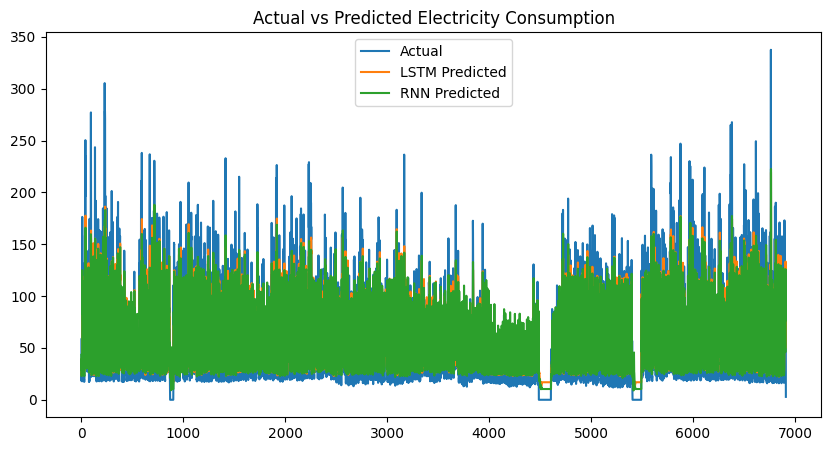

In [63]:
plt.figure(figsize=(10,5))
plt.plot(y_test_inv, label='Actual')
plt.plot(pred_lstm_inv, label='LSTM Predicted')
plt.plot(pred_rnn_inv, label='RNN Predicted')
plt.legend()
plt.title('Actual vs Predicted Electricity Consumption')
plt.show()

In [64]:
def mape(y_true, y_pred):
    epsilon = 1e-1
    return np.mean(np.abs((y_true - y_pred) / (y_true + epsilon)))

print("LSTM MAPE:", mape(y_test_inv, pred_lstm_inv))
print("RNN MAPE:", mape(y_test_inv, pred_rnn_inv))

LSTM MAPE: 6.679022991774595
RNN MAPE: 5.113199239208428


In [65]:
X_train = X_train.reshape(X_train.shape[0], X_train.shape[1], 1)
X_test = X_test.reshape(X_test.shape[0], X_test.shape[1], 1)

In [66]:
from tensorflow.keras.layers import Bidirectional, LSTM, Dense
from tensorflow.keras.models import Sequential

model_bilstm = Sequential([
    Bidirectional(LSTM(128, activation='relu'), input_shape=(time_steps, 1)),
    Dense(64, activation='relu'),
    Dense(16, activation='relu'),
    Dense(1)  # Output layer for regression
])

model_bilstm.compile(optimizer='adam', loss='mse')
model_bilstm.fit(X_train, y_train, epochs=20, batch_size=32, validation_data=(X_test, y_test))

Epoch 1/20
864/864 ━━━━━━━━━━━━━━━━━━━━ 14s 10ms/step - loss: 0.0125 - val_loss: 0.0066
Epoch 2/20
864/864 ━━━━━━━━━━━━━━━━━━━━ 6s 7ms/step - loss: 0.0089 - val_loss: 0.0061
Epoch 3/20
864/864 ━━━━━━━━━━━━━━━━━━━━ 6s 7ms/step - loss: 0.0085 - val_loss: 0.0060
Epoch 4/20
864/864 ━━━━━━━━━━━━━━━━━━━━ 10s 7ms/step - loss: 0.0085 - val_loss: 0.0065
Epoch 5/20
864/864 ━━━━━━━━━━━━━━━━━━━━ 10s 7ms/step - loss: 0.0084 - val_loss: 0.0058
Epoch 6/20
864/864 ━━━━━━━━━━━━━━━━━━━━ 10s 7ms/step - loss: 0.0082 - val_loss: 0.0064
Epoch 7/20
864/864 ━━━━━━━━━━━━━━━━━━━━ 7s 8ms/step - loss: 0.0083 - val_loss: 0.0061
Epoch 8/20
864/864 ━━━━━━━━━━━━━━━━━━━━ 6s 7ms/step - loss: 0.0081 - val_loss: 0.0061
Epoch 9/20
864/864 ━━━━━━━━━━━━━━━━━━━━ 6s 7ms/step - loss: 0.0082 - val_loss: 0.0061
Epoch 10/20
864/864 ━━━━━━━━━━━━━━━━━━━━ 6s 7ms/step - loss: 0.0081 - val_loss: 0.0057
Epoch 11/20
864/864 ━━━━━━━━━━━━━━━━━━━━ 6s 7ms/step - loss: 0.0081 - val_loss: 0.0057
Epoch 12/20
864/864 ━━━━━━━━━━━━━━━━━━━━ 6s 7ms

In [67]:
pred_bilstm = model_bilstm.predict(X_test)
y_test_inv = scaler.inverse_transform(y_test)
pred_bilstm_inv = scaler.inverse_transform(pred_bilstm)
print("BiLSTM MAPE:", mape(y_test_inv, pred_bilstm_inv))

216/216 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step
BiLSTM MAPE: 2.068308781173727


In [68]:
# Assuming predictions are already made
pred_rnn = model_rnn.predict(X_test)
pred_lstm = model_lstm.predict(X_test)
pred_bilstm = model_bilstm.predict(X_test)

# Inverse transform all predictions and y_test
pred_rnn_inv = scaler.inverse_transform(pred_rnn)
pred_lstm_inv = scaler.inverse_transform(pred_lstm)
pred_bilstm_inv = scaler.inverse_transform(pred_bilstm)
y_test_inv = scaler.inverse_transform(y_test)

216/216 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
216/216 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
216/216 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step


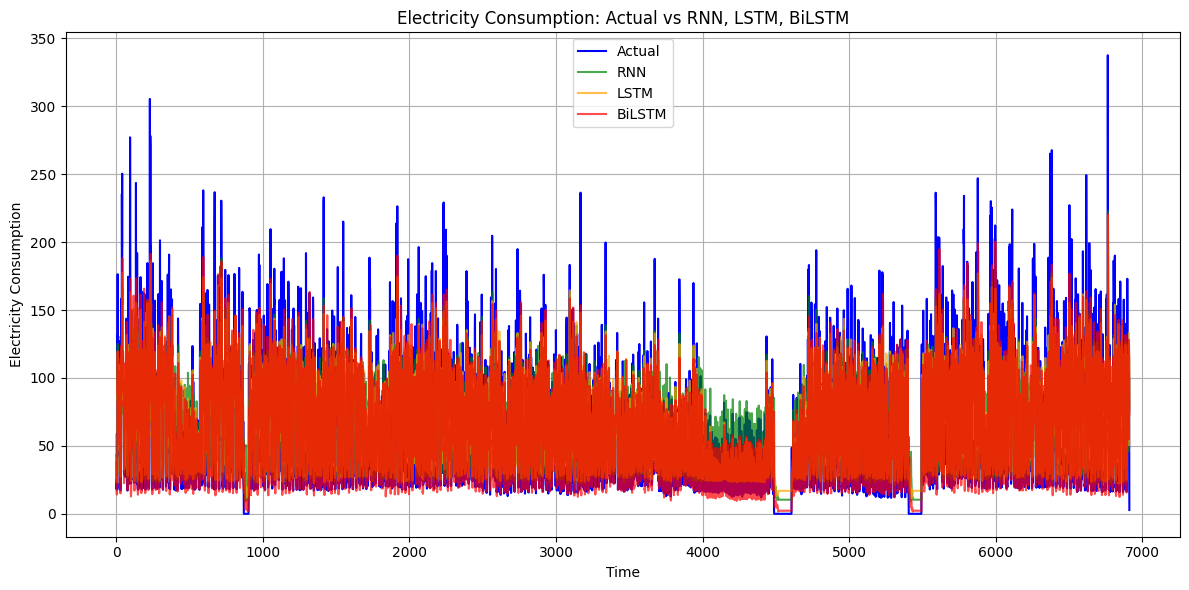

In [69]:
import matplotlib.pyplot as plt

plt.figure(figsize=(12,6))

# Plot actual values
plt.plot(y_test_inv, label='Actual', color='blue')

# Plot predictions
plt.plot(pred_rnn_inv, label='RNN', color='green', alpha=0.7)
plt.plot(pred_lstm_inv, label='LSTM', color='orange', alpha=0.7)
plt.plot(pred_bilstm_inv, label='BiLSTM', color='red', alpha=0.7)

plt.title('Electricity Consumption: Actual vs RNN, LSTM, BiLSTM')
plt.xlabel('Time')
plt.ylabel('Electricity Consumption')
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()

In [70]:
def mape(y_true, y_pred):
    epsilon = 1e-10  # small constant to avoid division by zero
    return np.mean(np.abs((y_true - y_pred) / (y_true + epsilon))) * 100

# Compute MAPE scores
mape_rnn = mape(y_test_inv, pred_rnn_inv)
mape_lstm = mape(y_test_inv, pred_lstm_inv)
mape_bilstm = mape(y_test_inv, pred_bilstm_inv)

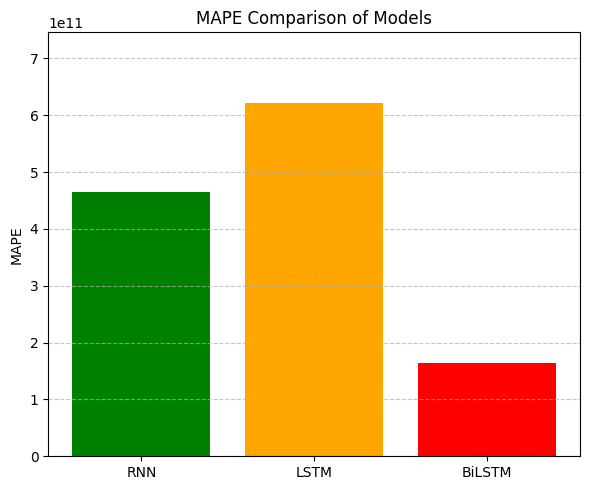

In [71]:
import matplotlib.pyplot as plt

# Model names and scores
models = ['RNN', 'LSTM', 'BiLSTM']
mape_scores = [mape_rnn, mape_lstm, mape_bilstm]

# Plot
plt.figure(figsize=(6,5))
bars = plt.bar(models, mape_scores, color=['green', 'orange', 'red'])

# Annotate bars with MAPE values
for bar in bars:
    height = bar.get_height()
    #plt.text(bar.get_x() + bar.get_width()/2, height + 0.5, f"{height:.2f}", ha='center', va='bottom')

plt.title('MAPE Comparison of Models')
plt.ylabel('MAPE')
plt.ylim(0, max(mape_scores)*1.2)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()

**BiLSTM outperforms other deep learning models.**

Epoch 1/20
864/864 ━━━━━━━━━━━━━━━━━━━━ 7s 8ms/step - loss: 0.0076 - val_loss: 0.0056
Epoch 2/20
864/864 ━━━━━━━━━━━━━━━━━━━━ 6s 7ms/step - loss: 0.0076 - val_loss: 0.0056
Epoch 3/20
864/864 ━━━━━━━━━━━━━━━━━━━━ 7s 8ms/step - loss: 0.0078 - val_loss: 0.0057
Epoch 4/20
864/864 ━━━━━━━━━━━━━━━━━━━━ 6s 7ms/step - loss: 0.0076 - val_loss: 0.0056
Epoch 5/20
864/864 ━━━━━━━━━━━━━━━━━━━━ 10s 7ms/step - loss: 0.0078 - val_loss: 0.0057
Epoch 6/20
864/864 ━━━━━━━━━━━━━━━━━━━━ 6s 7ms/step - loss: 0.0074 - val_loss: 0.0056
Epoch 7/20
864/864 ━━━━━━━━━━━━━━━━━━━━ 11s 8ms/step - loss: 0.0077 - val_loss: 0.0056
Epoch 8/20
864/864 ━━━━━━━━━━━━━━━━━━━━ 9s 7ms/step - loss: 0.0076 - val_loss: 0.0057
Epoch 9/20
864/864 ━━━━━━━━━━━━━━━━━━━━ 6s 7ms/step - loss: 0.0075 - val_loss: 0.0057
Epoch 10/20
864/864 ━━━━━━━━━━━━━━━━━━━━ 10s 7ms/step - loss: 0.0076 - val_loss: 0.0055
Epoch 11/20
864/864 ━━━━━━━━━━━━━━━━━━━━ 10s 8ms/step - loss: 0.0074 - val_loss: 0.0059
Epoch 12/20
864/864 ━━━━━━━━━━━━━━━━━━━━ 6s 7ms/

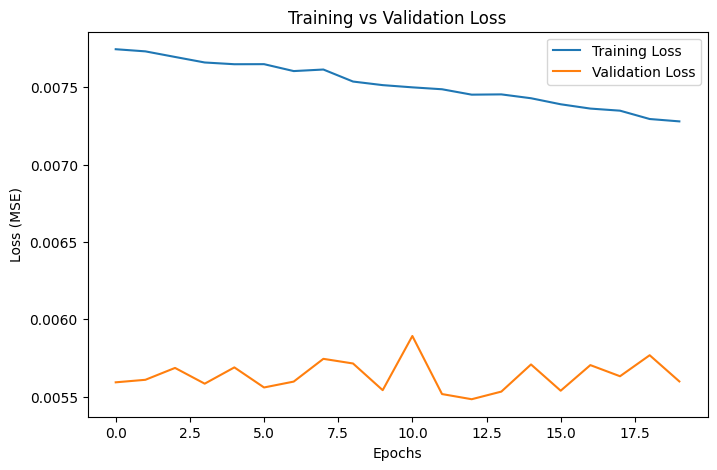

In [72]:
import matplotlib.pyplot as plt

# Assuming you trained the model as: history = model.fit(...)
history_bilstm = model_bilstm.fit(X_train, y_train, epochs=20, batch_size=32, validation_data=(X_test, y_test))
plt.figure(figsize=(8,5))
plt.plot(history_bilstm.history['loss'], label='Training Loss')
plt.plot(history_bilstm.history['val_loss'], label='Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss (MSE)')
plt.title('Training vs Validation Loss')
plt.legend()
plt.show()

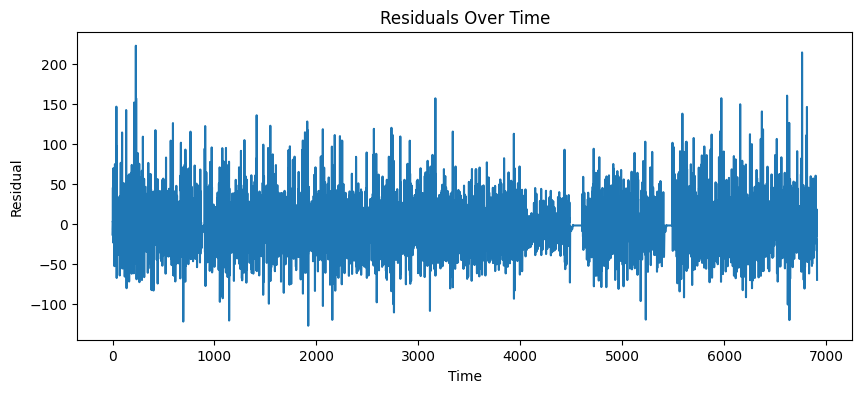

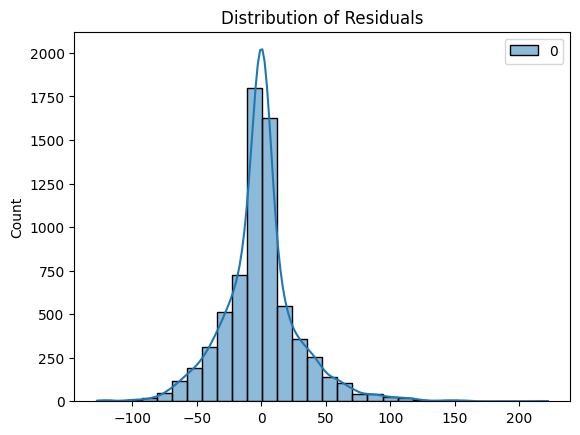

In [73]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Assuming y_test and y_pred are numpy arrays
residuals = y_test_inv - pred_bilstm_inv

plt.figure(figsize=(10,4))
plt.plot(residuals)
plt.title("Residuals Over Time")
plt.xlabel("Time")
plt.ylabel("Residual")
plt.show()

# Histogram of residuals
sns.histplot(residuals, kde=True, bins=30)
plt.title("Distribution of Residuals")
plt.show()